<a href="https://colab.research.google.com/github/t-kiran-05/TAYYIBA-KIRAN-DSMP-python/blob/main/Fake_News_Detection_Tayyiba_kiran_notebook_DSMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

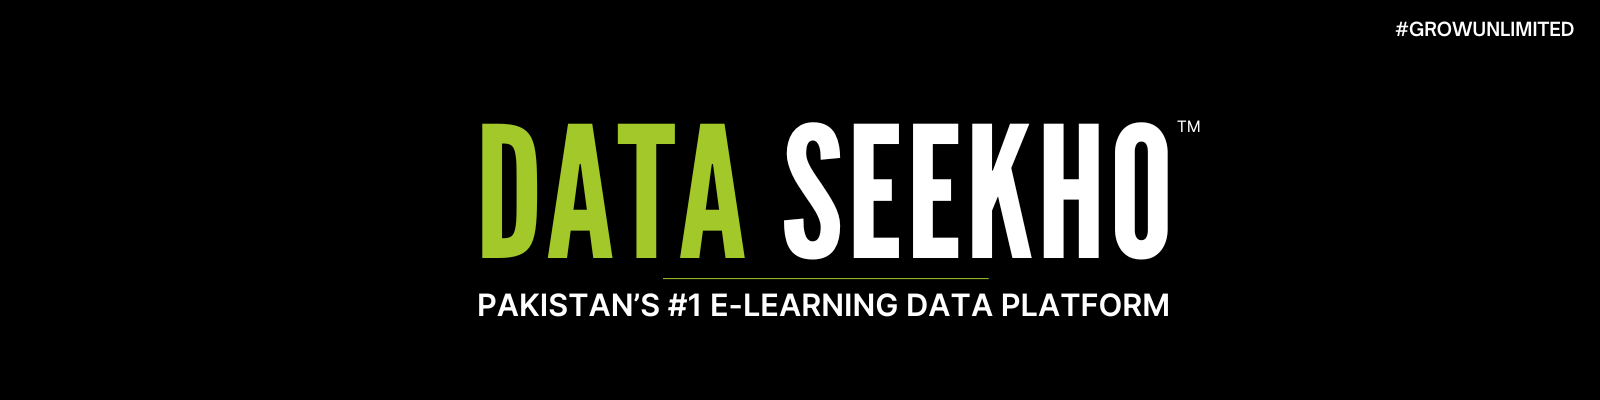

🚀 My Short Introduction!

🎓This is Tayyiba Kiran, an aspiring data professional at Data Seekho.

📚 Learning Python, SQL, Machine Learning, and more through Data Seekho’s courses.

💻 Engaging in hands-on projects and learning from industry experts.

🌟 Part of Data Seekho’s supportive community, aiming for top 1% in data.

🎯 Preparing for a successful career in Data Science with Data Seekho.

In [ ]:
!pip install datasets
# !pip install requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [ ]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from nltk.util import ngrams
from datasets import load_dataset

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('punkt_tab')

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
# Download the stopwords dataset
nltk.download('stopwords')
nltk.download("punkt")
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Directly load the dataset
dataset = load_dataset("ErfanMoosaviMonazzah/fake-news-detection-dataset-English")

# Access the training data
train_data = dataset['train']
print(train_data)


# Convert to pandas DataFrame
df = pd.DataFrame(train_data)

# Display the first few rows of the dataset
print(df.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md:   0%|          | 0.00/487 [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/78.4M [00:00<?, ?B/s]

validation.tsv:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8267 [00:00<?, ? examples/s]

Dataset({
    features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
    num_rows: 30000
})
   Unnamed: 0                                              title  \
0        2619  Ex-CIA head says Trump remarks on Russia inter...   
1       16043  YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...   
2         876  Federal Reserve governor Powell's policy views...   
3       19963  SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...   
4       10783  NANCY PELOSI ARROGANTLY DISMISSES Questions on...   

                                                text          subject  \
0  Former CIA director John Brennan on Friday cri...     politicsNews   
1  How did this man come to OWN this store? There...  Government News   
2  President Donald Trump on Thursday tapped Fede...     politicsNews   
3  Hillary Clinton ally David Brock is offering t...        left-news   
4  Pleading ignorance is a perfect ploy for Nancy...         politics   

                date  label  
0     July 22,

In [ ]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64


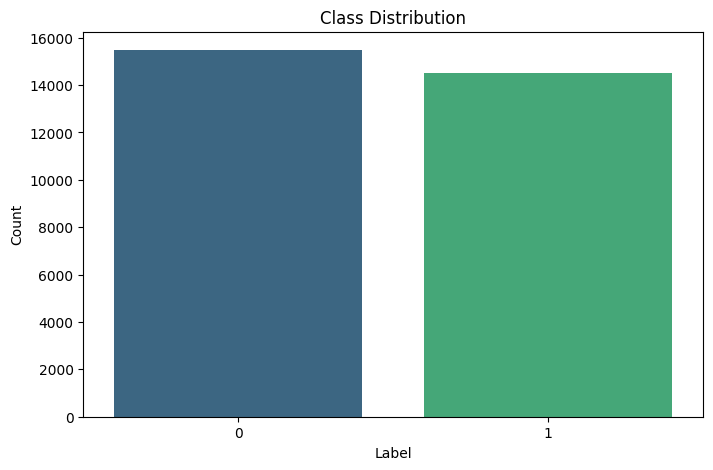

In [ ]:
# Check class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="label", palette="viridis", hue="label", legend=False)
plt.title("Class Distribution")
plt.xlabel("Label")  # Optional: label for x-axis
plt.ylabel("Count")  # Optional: label for y-axis
plt.show()

In [ ]:
# Define the cleaning function
def data_cleaning(text):
    stop_words = set(stopwords.words("english"))
    custom_stop_words = ['u', 'via', 'said','say', ...]  # Add your unwanted words here
    all_stop_words = stop_words.union(custom_stop_words)  # Combine stop words
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    text = str(text)

    # Remove non-alphabet characters, URLs, and extra spaces
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('(^\s+|\s+$)', ' ', text)
    text = re.sub("@[\w\d]+", ' ', text)  # Remove @ mentions
    text = re.sub("http:[\w\:\/\.]+", ' ', text)  # Remove URLs

    # Convert to lowercase and tokenize
    text = text.lower()
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    #tokens = [token for token in tokens if len(token) > 1]
    #tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 1 and re.match(r'^[a-zA-Z]+$', token) and token not in all_stop_words]  # Custom stop words and regex filter
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply data cleaning function to the DataFrame
df["cleaned_text"] = df["text"].apply(data_cleaning)
df.head()

,Unnamed: 0,title,text,subject,date,label,cleaned_text
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1,former cia director john brennan friday critic...
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0,man come store inform much fraudster except st...
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1,presid donald trump thursday tap feder reserv ...
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0,hillari clinton alli david brock offer pay new...
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0,plead ignor perfect ploy nanci pelosi believ c...


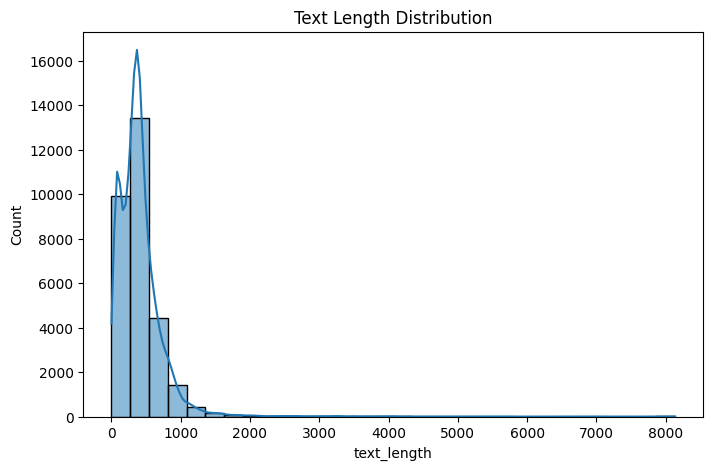

In [ ]:
# Check text length distribution
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.show()

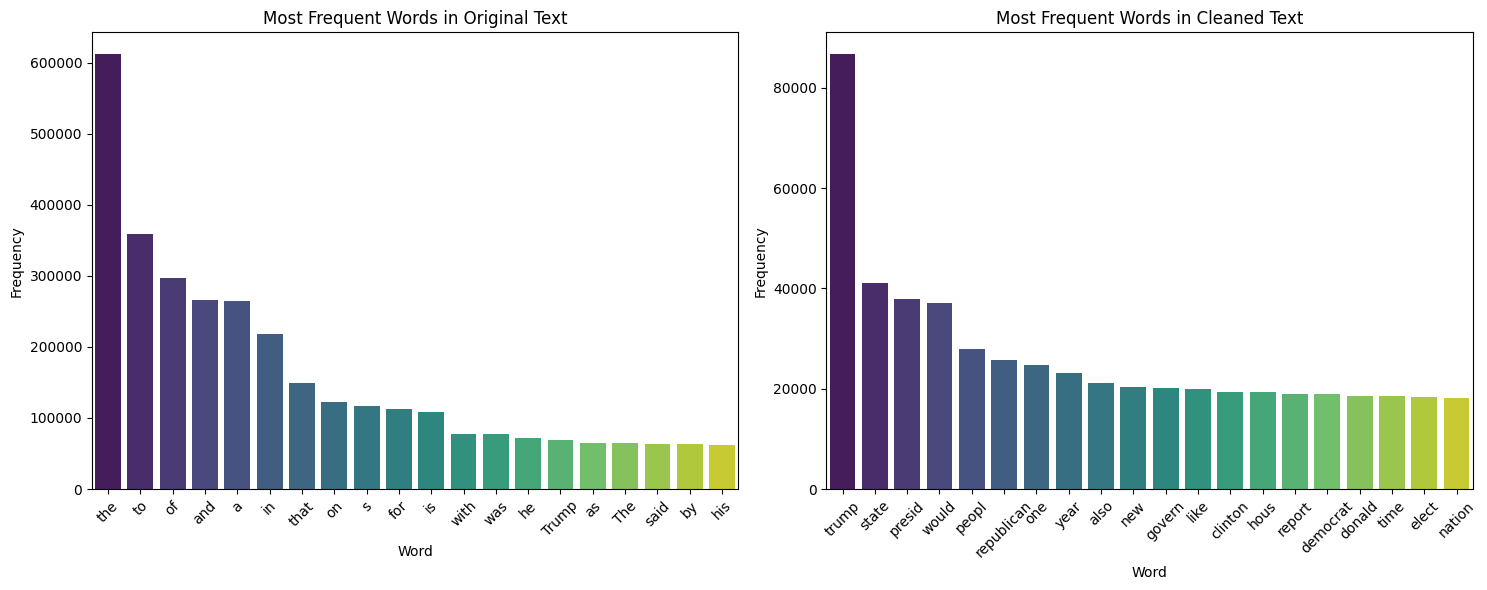

In [ ]:
# Tokenize all text in the 'text' column
all_words_text = " ".join(df["text"]).split()

# Tokenize all text in the 'cleaned_text' column
all_words_cleaned = " ".join(df["cleaned_text"]).split()

# Count word frequency for both columns
word_freq_text = Counter(all_words_text)
word_freq_cleaned = Counter(all_words_cleaned)

# Get the most common 20 words for both
common_words_text = word_freq_text.most_common(20)
common_words_cleaned = word_freq_cleaned.most_common(20)

# Convert both to DataFrames
common_df_text = pd.DataFrame(common_words_text, columns=["Word", "Frequency"])
common_df_cleaned = pd.DataFrame(common_words_cleaned, columns=["Word", "Frequency"])

# Create side-by-side subplots
plt.figure(figsize=(15, 6))

# Plot most common words for 'text' column in the first subplot
plt.subplot(1, 2, 1)  # (rows, cols, position)
sns.barplot(x="Word", y="Frequency", data=common_df_text, palette="viridis", hue="Word", legend=False)
plt.xticks(rotation=45)
plt.title("Most Frequent Words in Original Text")

# Plot most common words for 'cleaned_text' column in the second subplot
plt.subplot(1, 2, 2)  # (rows, cols, position)
sns.barplot(x="Word", y="Frequency", data=common_df_cleaned, palette="viridis", hue="Word", legend=False)
plt.xticks(rotation=45)
plt.title("Most Frequent Words in Cleaned Text")

# Display both plots side by side
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

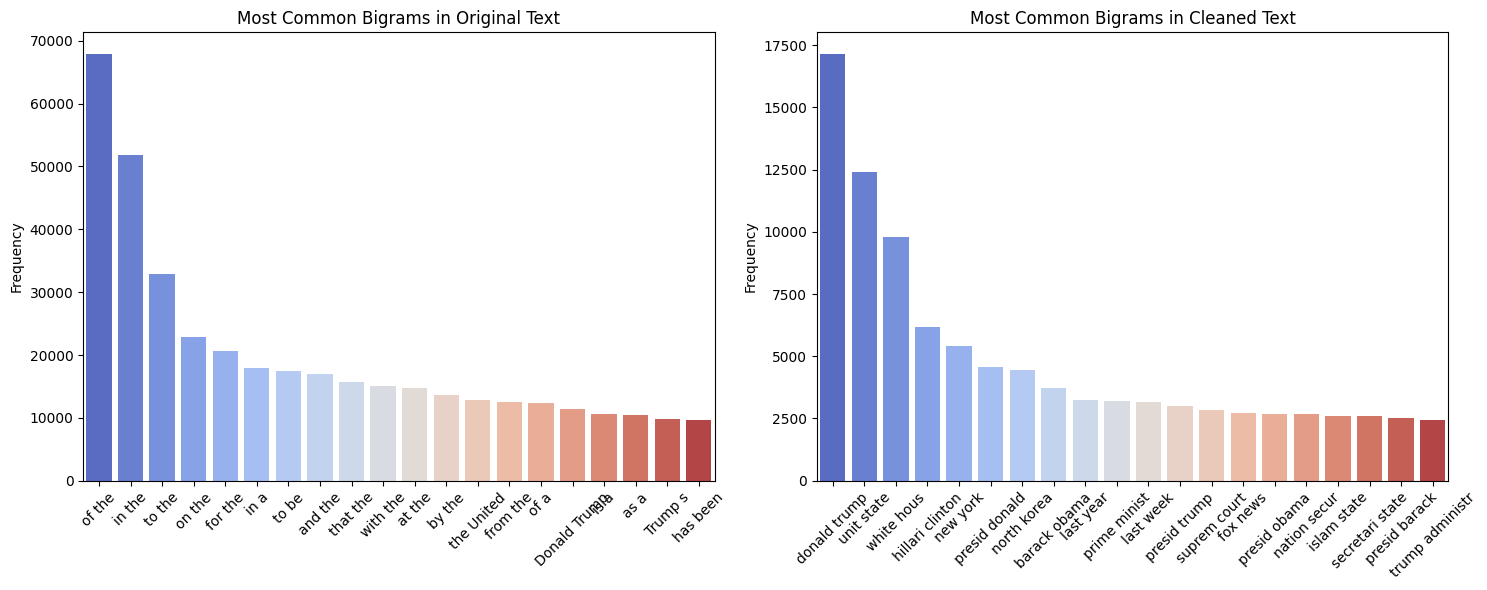

In [ ]:
# Function to extract top n-grams
def get_top_ngrams(text_series, n, top_n=20):
    all_words = " ".join(text_series).split()
    ngrams_list = list(ngrams(all_words, n))
    ngram_freq = Counter(ngrams_list)
    return ngram_freq.most_common(top_n)

# Get top bigrams for 'text' column
bigrams_text = get_top_ngrams(df["text"], 2)

# Get top bigrams for 'cleaned_text' column
bigrams_cleaned = get_top_ngrams(df["cleaned_text"], 2)

# Convert both to DataFrames
bigram_df_text = pd.DataFrame(bigrams_text, columns=["Bigram", "Frequency"])
bigram_df_cleaned = pd.DataFrame(bigrams_cleaned, columns=["Bigram", "Frequency"])

# Create side-by-side subplots
plt.figure(figsize=(15, 6))

# Plot bigrams for 'text' column in the first subplot
plt.subplot(1, 2, 1)  # (rows, cols, position)
sns.barplot(x=[" ".join(b) for b in bigram_df_text["Bigram"]], y=bigram_df_text["Frequency"], palette="coolwarm", hue=[" ".join(b) for b in bigram_df_text["Bigram"]], legend=False)
plt.xticks(rotation=45)
plt.title("Most Common Bigrams in Original Text")

# Plot bigrams for 'cleaned_text' column in the second subplot
plt.subplot(1, 2, 2)  # (rows, cols, position)
sns.barplot(x=[" ".join(b) for b in bigram_df_cleaned["Bigram"]], y=bigram_df_cleaned["Frequency"], palette="coolwarm", hue=[" ".join(b) for b in bigram_df_cleaned["Bigram"]], legend=False)
plt.xticks(rotation=45)
plt.title("Most Common Bigrams in Cleaned Text")

# Display both plots side by side
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

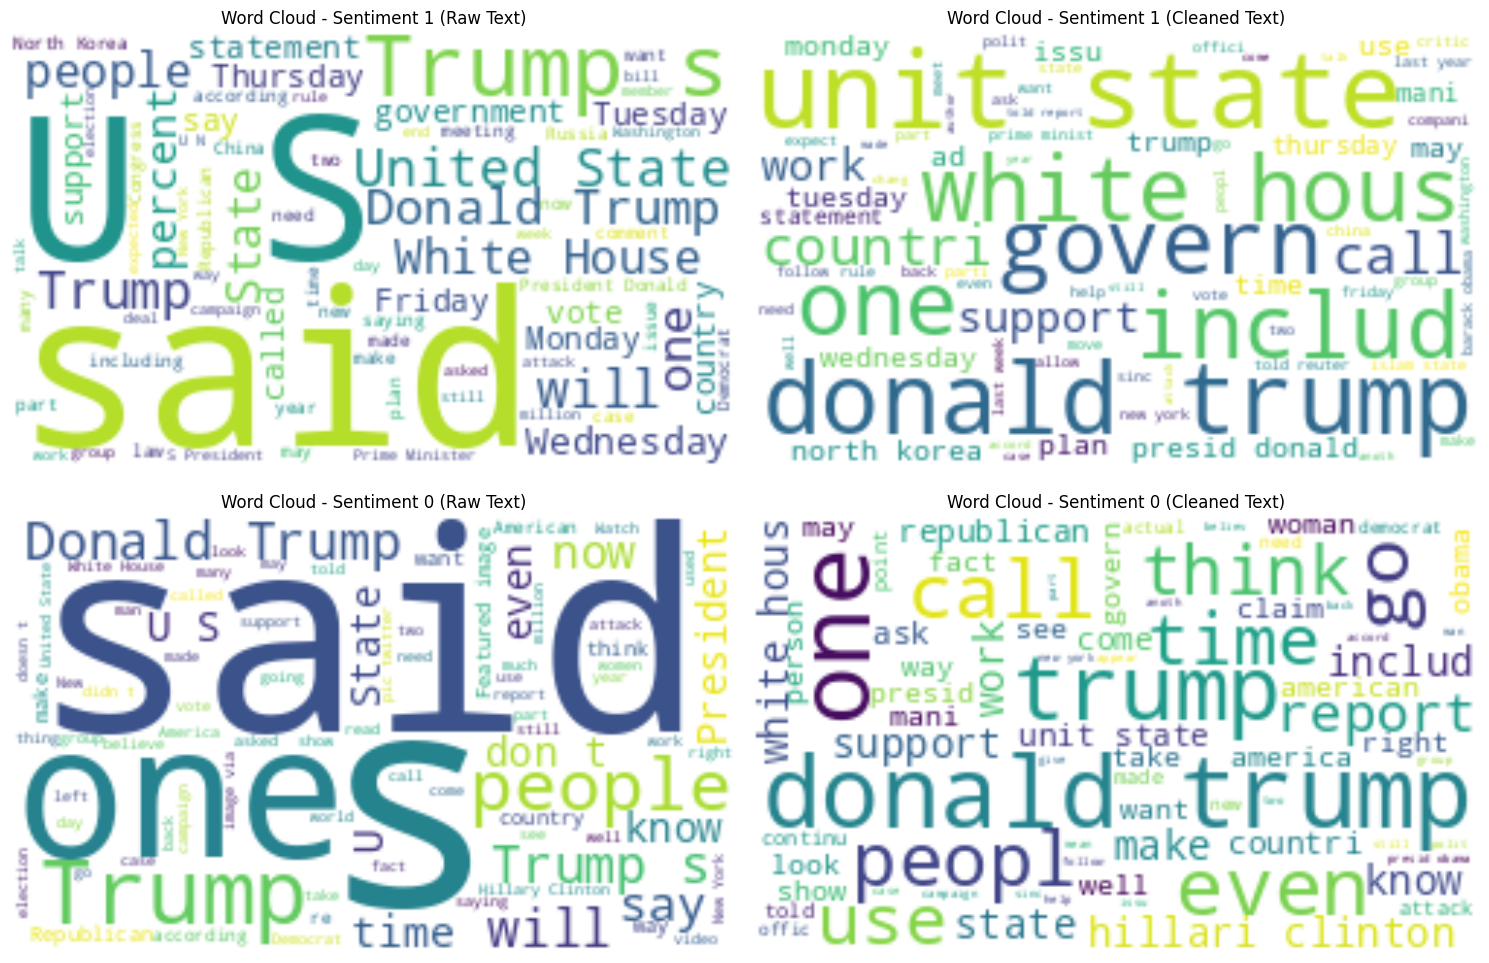

In [ ]:
# Get unique labels
unique_labels = df["label"].unique()
n_labels = len(unique_labels)

# Create figure with appropriate size (2 columns, n_labels rows)
plt.figure(figsize=(15, 5*n_labels))

for i, label in enumerate(unique_labels):
    # First subplot: Word cloud for 'text' column
    plt.subplot(n_labels, 2, i*2+1)
    words_text = " ".join(df[df["label"] == label]["text"])
    wordcloud_text = WordCloud(width=250, height=150, background_color="white").generate(words_text)
    plt.imshow(wordcloud_text, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Sentiment {label} (Raw Text)")

    # Second subplot: Word cloud for 'cleaned_text' column
    plt.subplot(n_labels, 2, i*2+2)
    words_cleaned = " ".join(df[df["label"] == label]["cleaned_text"])
    wordcloud_cleaned = WordCloud(width=250, height=150, background_color="white").generate(words_cleaned)
    plt.imshow(wordcloud_cleaned, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Sentiment {label} (Cleaned Text)")

plt.tight_layout()
plt.show()

In [ ]:

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_text"])

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display TF-IDF features
print(X_tfidf_df.head())


   aaron  abadi  abandon  abba  abbott  abc  abdullah  abe  abedin      abid  \
0    0.0    0.0      0.0   0.0     0.0  0.0       0.0  0.0     0.0  0.000000   
1    0.0    0.0      0.0   0.0     0.0  0.0       0.0  0.0     0.0  0.000000   
2    0.0    0.0      0.0   0.0     0.0  0.0       0.0  0.0     0.0  0.000000   
3    0.0    0.0      0.0   0.0     0.0  0.0       0.0  0.0     0.0  0.000000   
4    0.0    0.0      0.0   0.0     0.0  0.0       0.0  0.0     0.0  0.149482   

   ...  zarrab  zealand  zero  zika  zimbabw  zimbabwean  zink  zone  \
0  ...     0.0      0.0   0.0   0.0      0.0         0.0   0.0   0.0   
1  ...     0.0      0.0   0.0   0.0      0.0         0.0   0.0   0.0   
2  ...     0.0      0.0   0.0   0.0      0.0         0.0   0.0   0.0   
3  ...     0.0      0.0   0.0   0.0      0.0         0.0   0.0   0.0   
4  ...     0.0      0.0   0.0   0.0      0.0         0.0   0.0   0.0   

   zuckerberg  zuma  
0         0.0   0.0  
1         0.0   0.0  
2         0.0   0.0 

In [ ]:

# Define X (features) and y (labels)
X = X_tfidf
y = df["label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (24000, 5000)
Testing Data Shape: (6000, 5000)


In [ ]:


# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Define a function for evaluation
def evaluate_model(model_name, y_test, y_pred):
    print(f"\n🔹 Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate models
evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)

In [ ]:
def predict_sentiment(text, model):
    cleaned_text = data_cleaning(text)
    print(cleaned_text)
    text_vectorized = tfidf_vectorizer.transform([cleaned_text])
    prediction = model.predict(text_vectorized)
    return prediction[0]

# Test the model with a sample text
sample_text = "Trump is working hard for US."
print("Predicted Sentiment:", predict_sentiment(sample_text, lr_model))
